In [5]:
#pip install tf-nightly

     -------------------------------------- 175.2/175.2 MB 6.7 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 31.4 MB/s eta 0:00:00
     --------------------------------------- 23.2/23.2 MB 23.4 MB/s eta 0:00:00
  Using cached keras_nightly-2.12.0.dev2023011508-py2.py3-none-any.whl (1.7 MB)
  Using cached tb_nightly-2.12.0a20230114-py3-none-any.whl (5.7 MB)
  Using cached tf_estimator_nightly-2.12.0.dev2023010909-py2.py3-none-any.whl (440 kB)
  Using cached jax-0.4.1.tar.gz (1.2 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for jax: filename=jax-0.4.1-py3-none-any.whl size=1332487 sha256=f59d301da595fe4ac88e36ccf11470ff60e1e2cddfc4ee73640c2dd773f0958d
  Stored in directory: c:\users\timon\appdata\local\pip\cache\wheels\50\a9\f3\86082312fd44e12e52b1b7744c37ed1d02e64deefdc735c77b
Successfully built jax
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#pip install opencv-python

In [17]:
#pip list
print(tf.__version__)

2.6.0


In [81]:
import tensorflow as tf 
from tensorflow import keras
import os

import pandas as pd
import numpy as np

import cv2
import imghdr

import matplotlib.pyplot as plt

%matplotlib inline

In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from tensorflow.keras.models import load_model

### Working with car & people data -> prediction for car data from here on...

In [98]:
#vehicle dataset
data_dir = 'C:\\Users\\timon\\OneDrive\\Documents\\Datasets\\data'

#happy/sad dataset
#data_dir = 'data'

In [3]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

(64, 64, 3)


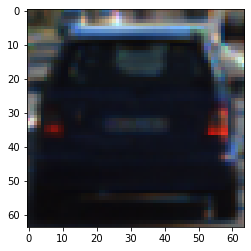

In [143]:
img = cv2.imread(os.path.join('C:\\Users\\timon\\OneDrive\\Documents\\Datasets\\data\\vehicles', '3.png'))
print(img.shape)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [99]:
#loop through folders check for correct file endings out of list and remove not existing ones
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

In [138]:
# tf.keras.preprocessing.image_dataset_from_directory??

In [100]:
#preprocess pictures with keras api

#happy/sad dataset
#data = tf.keras.preprocessing.image_dataset_from_directory('data')

#vehicle dataset
data = tf.keras.preprocessing.image_dataset_from_directory('C:\\Users\\timon\\OneDrive\\Documents\\Datasets\\data')




Found 17760 files belonging to 2 classes.


In [101]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [102]:
#iterating through the data with numpy for a lot of data
data_iterator = data.as_numpy_iterator()

In [103]:
#grabbing one batch in the iterator ;  click again for new  batch
batch = data_iterator.next()

In [104]:
#images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [98]:
"""
fig = plt.figure(figsize=(20,20))
for idx, img in enumerate(batch[0][:8]):
    plt.subplot(2, 4, idx + 1)
    plt.imshow(img.astype(int))
    plt.title(batch[1][idx])
    """

'\nfig = plt.figure(figsize=(20,20))\nfor idx, img in enumerate(batch[0][:8]):\n    plt.subplot(2, 4, idx + 1)\n    plt.imshow(img.astype(int))\n    plt.title(batch[1][idx])\n    '

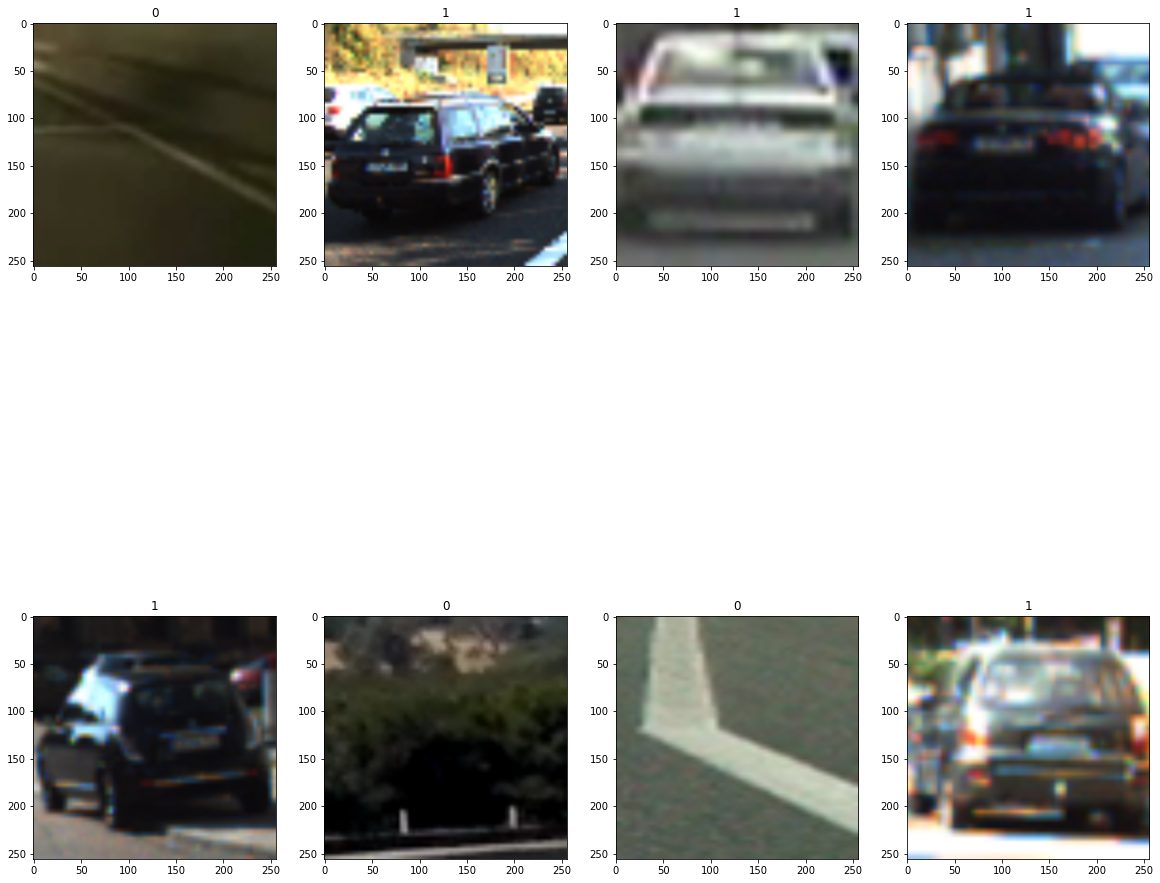

In [105]:
fig, ax = plt.subplots(ncols=4,nrows=2, figsize=(20,20))
for idx, img in enumerate(batch[0][:8]):
    ax[idx//4, idx%4].imshow(img.astype(int))
    ax[idx//4, idx%4].title.set_text(batch[1][idx])
    
#1 equals to sad & 0 equals to happy

#1 equals to vehicle & 0 equals to no vehicle

In [106]:
# scaling the data -> Normalizing

data = data.map(lambda x,y: (x/255, y))

In [107]:
#max batch size
len(data)

555

In [110]:
#split data into train_val_test data
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [111]:
train_size + val_size + test_size

555

In [112]:
#spliting in data and making sure to always use unused data
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [113]:
#building the model
model = Sequential()

In [114]:
#add layers
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation ='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [115]:
model.compile(loss = tf.losses.BinaryCrossentropy(), optimizer='adam', metrics=['accuracy'])

In [116]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 16)      

In [117]:
#logs for tensorboard
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [119]:
#Train the data
hist = model.fit(train, epochs=5, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/5
388/388 [==============================] - 535s 1s/step - loss: 0.1890 - accuracy: 0.9294 - val_loss: 0.1124 - val_accuracy: 0.9620
Epoch 2/5
388/388 [==============================] - 566s 1s/step - loss: 0.0701 - accuracy: 0.9780 - val_loss: 0.0744 - val_accuracy: 0.9741
Epoch 3/5
388/388 [==============================] - 430s 1s/step - loss: 0.0437 - accuracy: 0.9840 - val_loss: 0.0564 - val_accuracy: 0.9794
Epoch 4/5
388/388 [==============================] - 369s 949ms/step - loss: 0.0304 - accuracy: 0.9895 - val_loss: 0.0338 - val_accuracy: 0.9876
Epoch 5/5
388/388 [==============================] - 378s 974ms/step - loss: 0.0261 - accuracy: 0.9911 - val_loss: 0.0712 - val_accuracy: 0.9820


In [120]:
hist.history

{'loss': [0.188951313495636,
  0.07013595849275589,
  0.0436539500951767,
  0.030367843806743622,
  0.026148375123739243],
 'accuracy': [0.9294458627700806,
  0.9780122637748718,
  0.9839723110198975,
  0.9895296096801758,
  0.9911404848098755],
 'val_loss': [0.11237895488739014,
  0.07436361163854599,
  0.05637294054031372,
  0.033787764608860016,
  0.07122978568077087],
 'val_accuracy': [0.9619932174682617,
  0.9740990996360779,
  0.9794481992721558,
  0.9876126050949097,
  0.9819819927215576]}

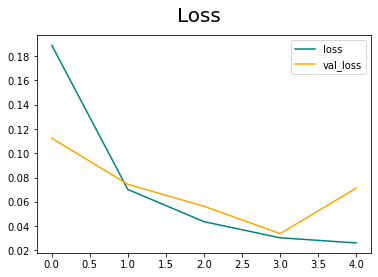

In [121]:
#analyzing the losses
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc="upper right")
plt.show()

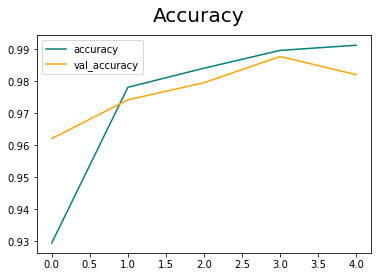

In [122]:
#analyzing the accuracies
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
# --> overfitting  
# needs to get handled...

In [123]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [124]:
#predicting the test data + confusion matrix + classification_report
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

predictions = (yhat > 0.5).astype(int)
cm = confusion_matrix(y, predictions)
print(cm)

print(classification_report(y, predictions))

1/1 [==============================] - 0s 299ms/step
[[20  0]
 [ 0 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        12

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



In [125]:
#evaluating the model
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.9988304376602173, Recall:0.9726651310920715, Accuracy:0.9860491156578064


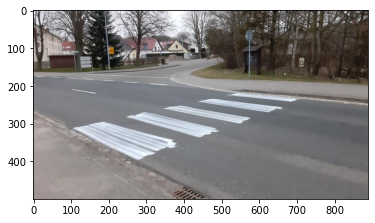

In [134]:
#Testing the model on completly unknown data from google
car = cv2.imread('data/car.jpg')
no_car = cv2.imread('data/no_car.jpg')

plt.imshow(cv2.cvtColor(no_car, cv2.COLOR_BGR2RGB))
plt.show()

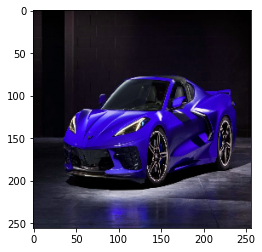

In [135]:
#resizing the image to 256,256
resize_car = tf.image.resize(car, (256,256))
resize_no_car = tf.image.resize(no_car, (256,256))
plt.imshow(resize_car.numpy().astype(int))
plt.show()

In [136]:
#predicting the unkown picture
pred_car = model.predict(np.expand_dims(resize_car/255, 0))
pred_no_car = model.predict(np.expand_dims(resize_no_car/255,0))

1/1 [==============================] - 0s 40ms/step


### Prediction of unseen data

In [137]:
print(pred_car)
print(pred_no_car)

[[1.]]
[[0.00073445]]


### Model enhancement ideas

In [ ]:
#spinn picture in preprocessing to enhance model performance

In [ ]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'learning_rate': [0.1, 0.01, 0.001],
              'batch_size': [32, 64, 128],
              'epochs': [10, 20, 30]}

# Create the grid search object
grid_search = GridSearchCV(model, param_grid, cv=3)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(grid_search.best_params_)

In [ ]:
#Data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create the data generator
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

# Fit the data generator to the data
datagen.fit(X_train)

# Train the model using the generator
model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=len(X_train) / 32,
                    epochs=50)

In [ ]:
#Preprocessing enhancements:

from skimage import color

# Convert the images to grayscale
X_train_gray = color.rgb2gray(X_train)
X_test_gray = color.rgb2gray(X_test)

# Normalize the images
X_train_gray = (X_train_gray - np.min(X_train_gray)) / (np.max(X_train_gray) - np.min(X_train_gray))
X_test_gray = (X_test_gray - np.min(X_test_gray)) / (np.max(X_test_gray) - np.min(X_test_gray))

In [ ]:
#transfer learning
from tensorflow.keras.applications import VGG16

# Load the VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the layers of the model
base_model.trainable = False

# Create the model
model = tf.keras.Sequential([
  base_model,
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size